This Business Case Analysis is to evaluate selling performance. First load the libraries.

In [1]:
import pandas as pd
from pandas import ExcelFile
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
reload(sys)
sys.setdefaultencoding('utf8')

In [2]:
data_original = pd.read_excel('Online Retail.xlsx')

# Overall purchasing analysis

The original dataset does not contain the total amount spent per purchase. Thus, I will add an extra column to compute the total amount of money spent per customer. This is an overall purchasing analysis.

In [3]:
TotalPrice = abs(data_original['Quantity']*data_original['UnitPrice'])
dfTotal = pd.DataFrame(TotalPrice, columns = ['TotalPrice'])
data_original = pd.concat([data_original,dfTotal], axis=1)

In [4]:
data_original

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


# Apply Natural Language Processing

Now I will apply nlp to identify categories for each of the purchased items. The aim with this analysis is to identify to which categorie does the description might be. Clothes, Personal Accessories, Home Accesories. For this purpose, I will build a set of words related to clothes, Personal Accessories and Home Accesories.

In [5]:
# set of words for each of the special categories, manually created. Get synonims of those words.
clothes = ['hat','warmer','hairband','hand','spinning','tops','jacket', 'coat', 'fashion', '', 'jeans', 'pullover', 'warmer','socks', 'shirt', 'gloves', 'shoes','underware', 'bra','panties','boxer', 'blazer', 'pijama', 'pants', 'hoodie']
personal_accessories = ['plasters','slate','stickers','feltcraft','tag','luggage','flag','paint','invites','paper','pen', 'wrap','cases','cones','candleholder','magnets','notebook','treasure','disco','incense','balloons','picture','cones','skulls','soldier','rope','kit','umbrella','clock','magnets','flower','ducks','thermometer','calculator','discount','globe','toy','retrospot','photo','shopper','tool','pc','bag','mugs','parasol','postage','jigsaw','puzzles','game','globe','tape','watch', 'ring', 'parade', 'strongman', 'plaster', 'beak','lipstick', 'sticker', 'ornament', 'apron', 'plasters','earrings', 'bracelet', 'necklace', 'hair', 'piercing']
home = ['jug','coasters','christmas','ribbons','parcel','craft','bell','woodland','candleholder','cutter','cushion','bucket','sponge','paper','lights','candles','tube','quilt','mirror','sign','placemats','bottle','doorstop','organiser','spoons','ribbons','chalkboard','wicker','board','baskets','table','ladders','box','hook','candle','bank', 'beakers', 'parasol','tea','chain','cup','coaster','knob','sign', 'doorsign','bin','plates','cabinet','frame','picture','woolly','towels','babushka','doormat','school','boxes', 'holder','building', 'home', 'block', 'blocks','sheet', 'bedroom', 'wool','kitchen', 't-light','light','lantern','napkins', 'bowl', 'scissor', 'bottle', 'cake', 'making', 'doll', 'doormat' 'block', 'mat', 'cutlery', 'bake', 'trellis','baking', 'magnets', 'mug','light', 'plasters', 'alarm', 'chalk', 'sticks']

In [6]:
#Delete stopwords.
setStopWords = set(stopwords.words('english'))
descriptions = list(data_original['Description'])
def cleanDescription(text):
    description_tokens = nltk.word_tokenize(str(text).lower().decode('utf-8'))
    tokens = set(description_tokens)
    inter_stop = tokens.intersection(setStopWords)
    return tokens.difference(inter_stop)
descriptionsClean = map(cleanDescription, descriptions)

In [7]:
type(descriptionsClean[2])

set

In [8]:
#Get synonims of the sets.
def getSynonims(word):
    syn = []
    for word in wordnet.synsets(word):
        for lemma in word.lemmas():
            syn.append(lemma.name())
    return syn
def getSemanticsCategorie(categoryGroup):
    synonims = []
    for word in categoryGroup:
        synonims.append(getSynonims(word))
    return set(list(itertools.chain(*synonims)))
#Synonims 
categorieClothes = getSemanticsCategorie(clothes)
categoriePersonalAccessories = getSemanticsCategorie(personal_accessories)
categorieHome = getSemanticsCategorie(home)

In [9]:
#Assign Categorie weight.
def categorieCoeficient(categorieString):
    switcher = {
        "clothes": 0.0,
        "personalaccessories":1.0,
        "categoriehome":2.0
    }
    return switcher.get(categorieString, "nothing") 

In [10]:
def assignCategorieValue(text):
    interClothes = float(len(text.intersection(categorieClothes)))/float(len(text))
    interPersonal = float(len(text.intersection(categoriePersonalAccessories)))/float(len(text))
    interHome = float(len(text.intersection(categorieHome)))/float(len(text))
    values = [interClothes, interPersonal, interHome]
    if values.index(max(values)) == 0:
        value = max(values) + categorieCoeficient("clothes")
    elif values.index(max(values)) == 1:
        value = max(values) + categorieCoeficient("personalaccessories")
    elif values.index(max(values)) == 2:
        value = max(values) + categorieCoeficient("categoriehome")
    else:
        value = max(values) + 3
    return value
categories = map(assignCategorieValue,descriptionsClean)

In [11]:
catDf = pd.DataFrame({
    'Description': descriptionsClean,
    'Categorie': categories
    })

In [12]:
catDf

,Categorie,Description
0,2.200000,"{t-light, heart, white, holder, hanging}"
1,2.333333,"{white, metal, lantern}"
2,0.200000,"{hearts, hanger, cream, cupid, coat}"
3,1.166667,"{knitted, union, flag, water, hot, bottle}"
4,2.166667,"{heart, woolly, ., hottie, white, red}"
5,2.200000,"{babushka, boxes, set, nesting, 7}"
6,2.400000,"{t-light, glass, holder, star, frosted}"
7,0.500000,"{union, warmer, jack, hand}"
8,0.400000,"{warmer, polka, red, dot, hand}"
9,1.250000,"{colour, ornament, bird, assorted}"


nl part

In [13]:
X = pd.concat([catDf['Categorie'],dfTotal], axis=1).values

In [14]:
max(X[:,1])

168469.6

In [15]:
pd.concat([catDf,dfTotal], axis=1).to_csv('x.csv')

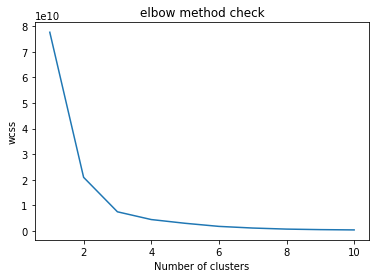

In [16]:
#number of clusters? Using elbow method
def generateElbow(X):
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    return wcss
wcss = generateElbow(X)
plt.plot(range(1,11), wcss)
plt.title('elbow method check')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()
#According with the result the recommended amount of clusters is 4.

In [17]:
#applying clusters with 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [18]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [19]:
#Overall clustered dataset
overallClusters = pd.concat([data_original,catDf['Categorie'],pd.DataFrame({'OverallClusters':y_kmeans})], axis=1)
overallClusters

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Categorie,OverallClusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2.200000,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.333333,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0.200000,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1.166667,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.166667,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2.200000,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2.400000,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,0.500000,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,0.400000,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,1.250000,0


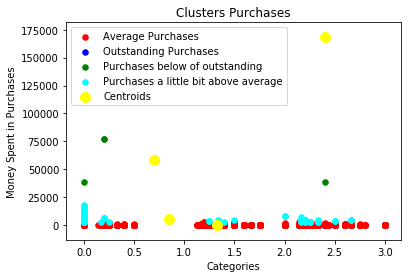

In [20]:
#visualizing the reuslts
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Average Purchases')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Outstanding Purchases')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Purchases below of outstanding')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Purchases a little bit above average')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')
plt.title('Clusters Purchases')
plt.xlabel('Categories')
plt.ylabel('Money Spent in Purchases')
plt.legend()
plt.show()

*According with the artificial intelligence alike weights assign in the natural language processing part, categorie value between 0-1 represent clothes, 1-2 represent personal accessories and 2-3 represent home accessories.

In the above mentioned scatter plot we can appreciate the overall behaviour of purchases. However, "average purchases (red)" and "purchases a little bit above average (cyan)" deserve the time to again perform a second clustering technique to zoom in better into the regular purchases business performance. 

In [21]:
#recreating the dataset.
averageClusters = overallClusters.query('OverallClusters == 3 or OverallClusters == 0') 
averageClusters

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Categorie,OverallClusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2.200000,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.333333,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0.200000,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,1.166667,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2.166667,0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2.200000,0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2.400000,0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,0.500000,0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,0.400000,0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,1.250000,0


In [22]:
#Find new amount of clusters
newX = averageClusters.iloc[:,[9,8]].values

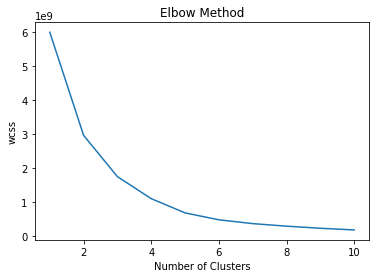

In [23]:
newwcss = generateElbow(newX)
plt.plot(range(1,11), newwcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()
#According with the results 4 clusters are the choosen ones. 

In [24]:
#applying clusters with 4.
newkmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
newy_kmeans = kmeans.fit_predict(newX)

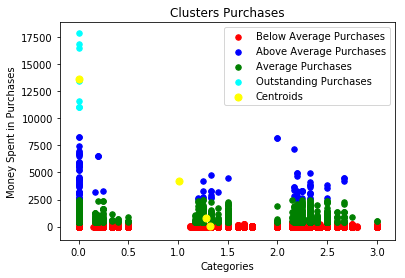

In [25]:
#visualizing the reuslts
plt.scatter(newX[newy_kmeans == 0, 0], newX[newy_kmeans == 0, 1], s = 30, c = 'red', label = 'Below Average Purchases')
plt.scatter(newX[newy_kmeans == 1, 0], newX[newy_kmeans == 1, 1], s = 30, c = 'blue', label = 'Above Average Purchases')
plt.scatter(newX[newy_kmeans == 2, 0], newX[newy_kmeans == 2, 1], s = 30, c = 'green', label = 'Average Purchases')
plt.scatter(newX[newy_kmeans == 3, 0], newX[newy_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Outstanding Purchases')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='yellow', label='Centroids')
plt.title('Clusters Purchases')
plt.xlabel('Categories')
plt.ylabel('Money Spent in Purchases')
plt.legend()
plt.show()